In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [2]:
# Abrir o dataset

df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
# Visualizar estrutura
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar alguns dados
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


### EDA

In [5]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

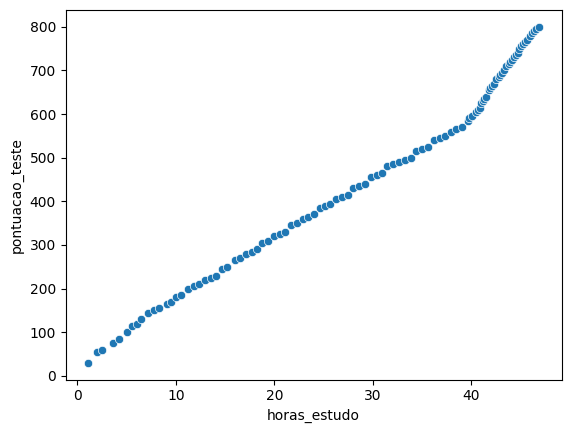

In [6]:
# Plot de dispersão
# X = horas de estudo
# y = pontuação do teste
sns.scatterplot(data=df_pontuacao, x = 'horas_estudo', y = 'pontuacao_teste')

<Axes: ylabel='horas_estudo'>

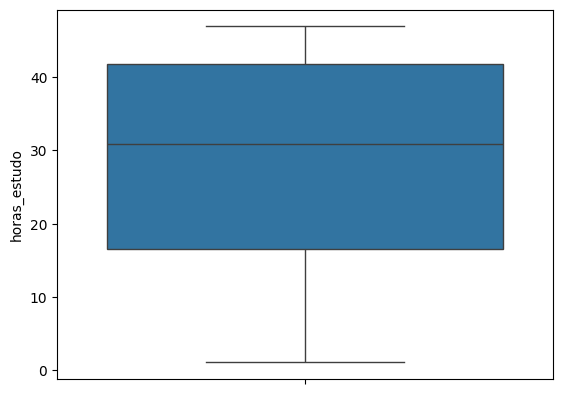

In [7]:
# Verificar outliers por meio do boxplot
sns.boxplot(df_pontuacao, y = 'horas_estudo')

<Axes: ylabel='pontuacao_teste'>

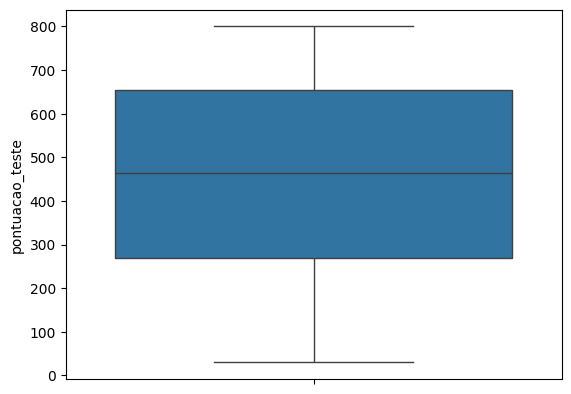

In [8]:
# Verificar outliers por meio do boxplot
sns.boxplot(df_pontuacao, y = 'pontuacao_teste')

<Axes: >

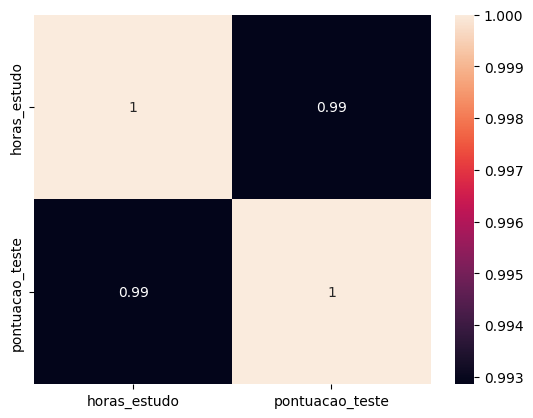

In [9]:
# Verificar correlação - pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

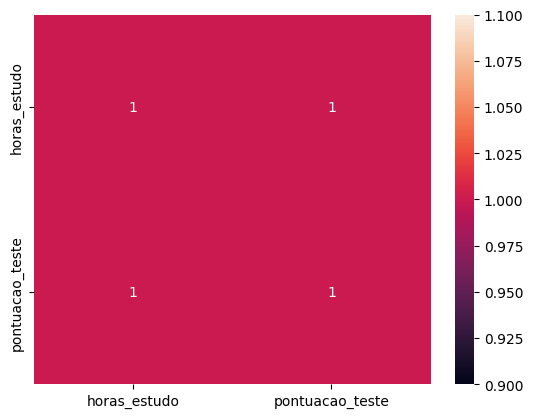

In [10]:
# Verificar correlação - spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

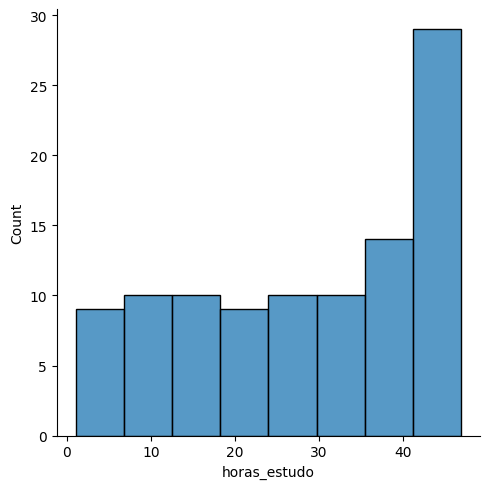

In [11]:
# Histograma das variáveis
sns.displot(df_pontuacao, x = 'horas_estudo')

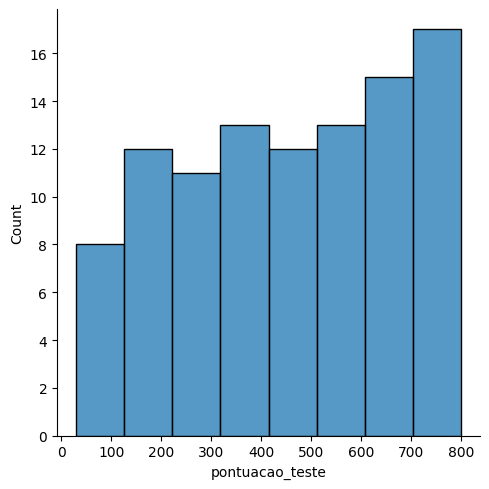

In [12]:
# Histograma das variáveis
sns.displot(df_pontuacao, x = 'pontuacao_teste')

### Treinar modelo

In [13]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 50)

In [14]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [15]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 15.642619x + 8.476601


### Validar o modelo - métricas

In [18]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [19]:
# Calcular métrica R-squared ou coeficiente de determinação
# R² representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [20]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = média entre y_test e y_pred
# Métrica de fácil interpretação (escala conhecida)
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134615

In [21]:
# Calcular métrica MSE (mean squared error)
# MSE = média (y_test - y_pred)²
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

766.9972992416427

In [22]:
# Calcular métrica MRSE (mean Root squared error)
# MSE = raíz (média (y_test - y_pred)²)
# É uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred, squared=False)

27.69471608884342

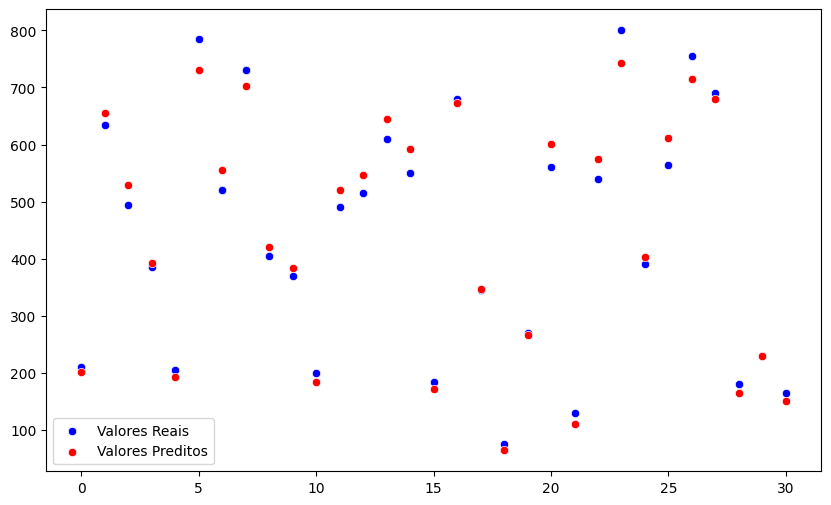

In [24]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de resíduos

In [25]:
# Calcular resíduos
residuos = y_test - y_pred

In [26]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento desse conjunto X (X - média) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

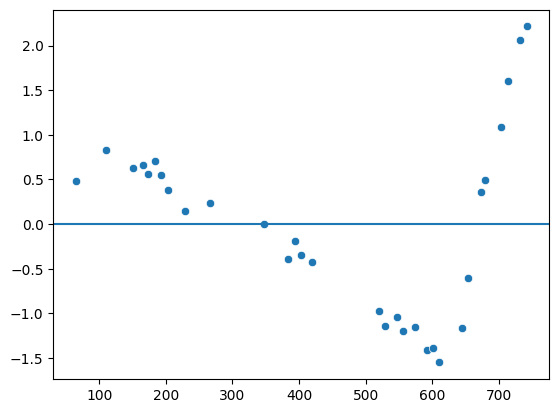

In [27]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, caso contrário, se tivermos alguma tendência ou padrão (formam um cone ou funil, há heterocedasticidade)

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

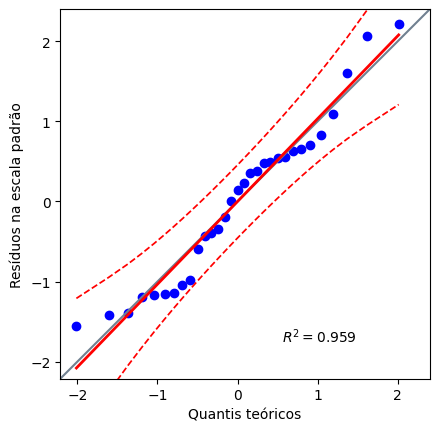

In [29]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [32]:
# Teste de normalidade - Shapiro Wilk
# H0 - segue distribuição normal
# H1 - não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e p-valor: {}".format(stat_shapiro, p_valor_shapiro))


Estatística do teste: 0.9500530362129211 e p-valor: 0.15663613379001617


In [33]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - segue distribuição normal
# H1 - não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e p-valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.48355808450512827 e p-valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [34]:
# Se eu estudar 30.4h, qual a pontuação prevista pelo modelo
reg_model.predict([[30.4]])

array([[484.01220436]])

In [35]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = ax + b
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.81485802710669

## Salvar modelo para usar depois

In [36]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']